In [ ]:
# Lesion Segmentation

In [27]:
import nrrd
import numpy as np 

from matplotlib import pyplot as plt
from PIL import Image
from ipycanvas import MultiCanvas

In [28]:
data, header = nrrd.read('fullImage.nrrd')

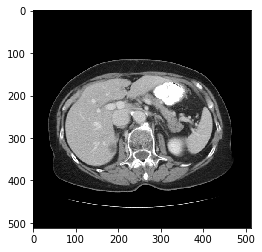

In [33]:
plt.imshow(data, cmap='gray')
plt.imsave('asfile.png', data, cmap='gray')

In [ ]:
from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox

from ipycanvas import MultiCanvas, hold_canvas

In [ ]:
canvas = MultiCanvas(2, size=(512, 512))

background_layer = canvas[0]
drawing_layer = canvas[1]

drawing = False
start = None

    
def on_mouse_up(x, y):
    global drawing
    
    if drawing:
        drawing = False

def on_mouse_down(x, y):
    global drawing

    if not drawing:
        drawing = True
        drawing_layer.begin_path()
        drawing_layer.move_to(x, y)
        

def on_mouse_move(x, y):
    global drawing
    
    if not drawing:
        return
    
    drawing_layer.line_to(x, y)
    drawing_layer.stroke()

drawing_layer.on_mouse_down(on_mouse_down)
drawing_layer.on_mouse_up(on_mouse_up)
drawing_layer.on_mouse_move(on_mouse_move)

background_layer.put_image_data(data, 0, 0)

drawing_layer.stroke_style = 'rgba(255, 0, 0, 0.5)'
drawing_layer.line_width = 3

canvas
# picker = ColorPicker(description='Color:', value='#749cb8')
# slider = IntSlider(description='Line width:', value=3, min=1, max=20)

# link((picker, 'value'), (drawing_layer, 'fill_style'))
# link((picker, 'value'), (interaction_layer, 'stroke_style'))
# link((slider, 'value'), (drawing_layer, 'line_width'))
# link((slider, 'value'), (interaction_layer, 'line_width'))

# AppLayout(center=canvas, footer=HBox((picker, slider)))

In [56]:
my_html = """

		<div id="container">
			<canvas id="imageView" width="512" height="512"></canvas>
		</div>
        <button onclick="get_mask()">Get Segmentation Mask</button>
        <button onclick="clear_canvas()">Clear Segmentation</button>
		<script>
  var canvas, context;

  function init () {
    
    // Find the canvas element.
    canvas = document.getElementById('imageView');
    if (!canvas) {
      alert('Error: I cannot find the canvas element!');
      return;
    }

    if (!canvas.getContext) {
      alert('Error: no canvas.getContext!');
      return;
    }

    // Get the 2D canvas context.
    context = canvas.getContext('2d');
    if (!context) {
      alert('Error: failed to getContext!');
      return;
    }
    
    context.strokeStyle = 'red';
    context.lineWidth = 3;
    
    
	tool = new tool_pencil();

	// Attach the mousedown, mousemove and mouseup event listeners
	canvas.addEventListener('mousedown', ev_canvas, false);
	canvas.addEventListener('mousemove', ev_canvas, false);
	canvas.addEventListener('mouseup',	 ev_canvas, false);
    
    canvas.style.background = "url('asfile.png')";
}

// This painting tool works like a drawing
// pencil which tracks the mouse movements
function tool_pencil () {
	var tool = this;
	this.started = false;

	// This is called when you start holding down the mouse button
	// This starts the pencil drawing
	this.mousedown = function (ev) {
			context.beginPath();
			context.moveTo(ev._x, ev._y);
			tool.started = true;
	};

	// This function is called every time you move the mouse. Obviously, it only
	// draws if the tool.started state is set to true (when you are holding down
	// the mouse button)
	this.mousemove = function (ev) {
		if (tool.started) {
			context.lineTo(ev._x, ev._y);
			context.stroke();
		}
	};

	// This is called when you release the mouse button
	this.mouseup = function (ev) {
		if (tool.started) {
			tool.mousemove(ev);
			tool.started = false;
		}
	};
}

// The general-purpose event handler. This function just determines
// the mouse position relative to the <canvas> element
function ev_canvas (ev) {
	// Firefox
	if (ev.layerX || ev.layerX == 0) {
		ev._x = ev.layerX;
		ev._y = ev.layerY;
	// Opera
	} else if (ev.offsetX || ev.offsetX == 0) {
		ev._x = ev.offsetX;
		ev._y = ev.offsetY;
	}

	// Call the event handler of the tool
	var func = tool[ev.type];
	if (func) {
		func(ev);
	}
}

function clear_canvas() {

}

function get_mask () {
    var command = "dataURL = '" + canvas.toDataURL() + "'";
    console.log("Executing Command: " + command);

    var kernel = IPython.notebook.kernel;
    kernel.execute(command);
}

  init();
        </script>
	</body>
</html>
"""

In [23]:
from IPython.display import HTML
import base64
from PIL import Image
from io import BytesIO

In [58]:
HTML(my_html)

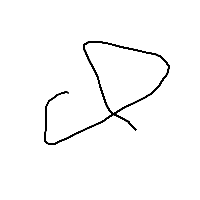

In [26]:
im = Image.open(BytesIO(base64.b64decode(dataURL.split(',')[1])))
im